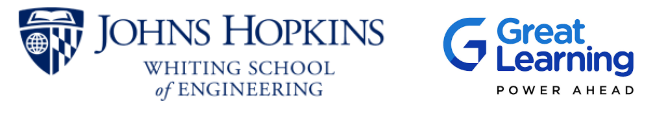

<font size=10>**Retrieval Augmented Generation (RAG)**</font>

<font size=6>**Salesforce CRM Q&A Assistant**</font>

#<font color=blue> **Business Problem - Empowering Internal Sales Teams with RAG-powered CRM Assistance**

MarketTrend Solutions, a mid-sized enterprise, uses Salesforce CRM to manage vast amounts of internal sales data, from customer touchpoints to opportunity pipelines. The sales team frequently needs to access specific information from Salesforce documentation—ranging from feature usage, integration workflows, and analytics configuration to reporting best practices—to support ongoing campaigns, onboarding, and customer interactions.


However, the internal sales team often struggles to retrieve timely and precise information from the CRM due to:

- Complex navigation through large volumes of notes, reports, and call summaries

- Inconsistent answers from different agents due to subjective interpretations

- Time lost in manually reviewing past conversations and documents


To streamline internal operations and ensure uniform understanding across the team, the leadership has initiated the development of an AI-powered assistant that enables instant, context-aware answers to the sales team’s day-to-day questions.



##<font color=blue> **Key Business Outcomes**
✅ **Faster Query Resolution** – Instant, accurate answers from CRM records, reducing manual lookup effort

✅ **Enhanced Decision-Making** – Sales reps make informed decisions backed by contextual, factual responses

✅ **Improved Productivity** – Frees up time spent searching for information, allowing focus on closing deals

✅ **Reduced Cognitive Load** – Simplifies access to unstructured data (notes, summaries, transcripts)

✅ **Knowledge Retention** – Institutional knowledge becomes accessible via search, not memory

## <font color=blue> **Objective**
The primary goal is to build a Retrieval-Augmented Generation (RAG) assistant that:

🔹 Integrates seamlessly with Salesforce CRM notes and internal reports

🔹 Allows internal users to ask free-form queries about deals, customers, or products

🔹 Returns grounded responses using actual sales data, ensuring factual accuracy

🔹 Support productivity by offering contextual responses tailored to sales-specific use cases.

🔹 Ensure that the retrieved information is trustworthy and traceable to original documentation.



## <font color='blue'>**Solution Approach**</font>

<font color='blue'>**1. Data Ingestion and Chunking**</font>
* Install necessary libraries and load the CRM documents from a local folder using **LangChain’s** `PyPDFLoader` with TextLoader.
* Apply RecursiveCharacterTextSplitter to break the documents into overlapping text chunks while preserving semantic context.

<font color='blue'>**2. Embedding & Vector Store Creation**</font>
* Generate text embeddings using OpenAIEmbeddings to convert text chunks into vector representations.
* Create a vector store using Chroma, and persist it locally using .persist() for reusability.

<font color='blue'>**3. Query Handling & Answer Generation**</font>
* Retrieve top-k most relevant document chunks from Chroma using semantic similarity search.
* Feed the retrieved context and user query into a custom prompt template using LangChain’s LLMChain with ChatOpenAI.
* Generate a final answer based on the prompt + context and strictly grounded in the provided context.

<font color='blue'>**4. LLM-Based Multi-Metric Evaluation (MLS)**</font>
* Use a second LLMChain to evaluate the generated response using five key evaluation metrics:
  * **Groundedness –** Is the answer supported by retrieved context?

  * **Relevance –** Does the answer align with the user’s query?

  * **Faithfulness –** Are the statements logically valid and consistent?

  * **Context Precision –** Does the answer avoid including irrelevant context?

  * **Context Recall –** Has it captured all important info from context?

* Each metric is scored on a scale of 1–5 and accompanied by a justification generated by the LLM.


## <font color='blue'>**Solution Workflow**</font>

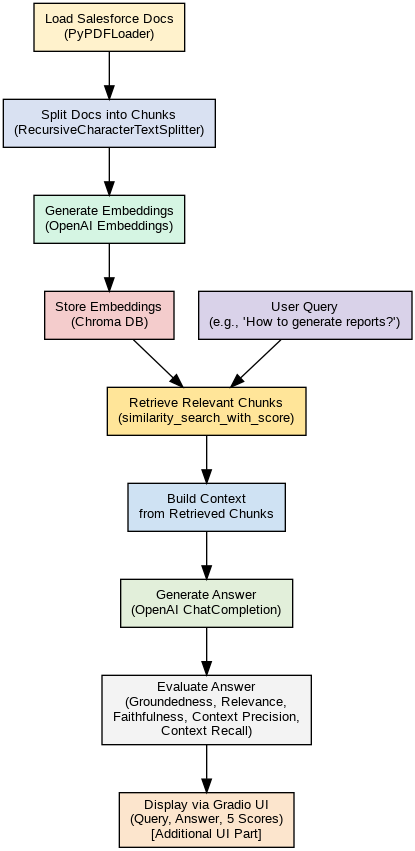

## **Business Questions for Evaluation**

The RAG system is designed to embed and store large documentation sets, conduct vector similarity search, and generate accurate answers using a Large Language Model (LLM) with clear provenance of the retrieved context.

Here are example questions that the internal sales team frequently asks, which the RAG assistant should be able to answer accurately:

*1. What are the key features and functionalities of Salesforce CRM's Sales Cloud module?*

*2. What are the steps to integrate third-party marketing tools with Salesforce CRM?*

*3. How do I generate a report showing lead conversion rates by region?*

*4. How can we track and report on customer satisfaction in Salesforce?*

*5. Where can I find historical engagement data for a specific customer?*

*6. What is the best way to segment customers for an upcoming campaign*?

*7. What are the best practices for updating opportunities during a sales review?*

*8. Can we automate lead assignment based on geography or product interest?*

These questions are intentionally business-critical, ensuring the RAG system is tested for both completeness and precision in responses.


# **<font color='blue'>Library Installation and OpenAI LLM Calling</font>**

In [ ]:
# Install required libraries
!pip install langchain_community langchain chromadb pypdf tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.6 MB/s eta 0:00:00

In [24]:
# Import libraries
import os
from langchain_community.document_loaders import PyPDFLoader
from openai import OpenAI
import json
import requests # type: ignore
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file

In [4]:
# Load the JSON file and extract values
#file_name = 'config.json'
#with open(file_name, 'r') as file:
#    config = json.load(file)
#    API_KEY = config.get("API_KEY") # Loading the API Key
#    OPENAI_API_BASE = config.get("OPENAI_API_BASE") # Loading the API Base Url
#
#model_name = "gpt-4o-mini"

# Storing API credentials in environment variables
#os.environ['OPENAI_API_KEY'] = API_KEY
#os.environ["OPENAI_BASE_URL"] = OPENAI_API_BASE

# Initialize OpenAI client
#client = OpenAI()

# Initialize OpenAI client
client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
)
model_name = "gpt-4o-mini"

# Create a chat completion
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello, how are you. are you alive?"}
    ]
)

# Print the assistant's reply
print(completion.choices[0].message.content)


Hello! I'm here to help, but I'm not alive—I'm an artificial intelligence designed to assist you with your questions and tasks. How can I assist you today?


# **<font color='blue'>Data Ingestion and Chunking</font>**

**This section loads all Salesforce-related PDF documents and chunks them into manageable sizes for LLM input.**

In [ ]:
#! unzip "/content/Salesforce.zip"

Archive:  /content/Salesforce.zip
  inflating: Salesforce/Customer_Experience_Intelligence.pdf  
  inflating: Salesforce/Get_started_salesforce.pdf  
  inflating: Salesforce/Sales_Cloud_basics.pdf  
  inflating: Salesforce/Sales_Cloud_Einstein.pdf  
  inflating: Salesforce/Salesforce_data_security_trends.pdf  
  inflating: Salesforce/Salesforce_Release_Notes.pdf  


In [8]:
# Uploading multiple pdfs:
from glob import glob
from langchain_community.document_loaders import PyPDFLoader

# Path to folder with PDFs
DOC_FOLDER = "/Users/mjn/code/data/rag_poc/Salesforce/"
pdf_files = glob(DOC_FOLDER + "*.pdf")  # grabs all PDFs in the folder

all_pages = []

# Load each PDF and extract pages
for pdf_path in pdf_files:
    loader = PyPDFLoader(pdf_path)
    pages = loader.load()
    all_pages.extend(pages)

In [10]:
print(pdf_files)

['/Users/mjn/code/data/rag_poc/Salesforce/Customer_Experience_Intelligence.pdf', '/Users/mjn/code/data/rag_poc/Salesforce/Salesforce_Release_Notes.pdf', '/Users/mjn/code/data/rag_poc/Salesforce/Get_started_salesforce.pdf', '/Users/mjn/code/data/rag_poc/Salesforce/Sales_Cloud_basics.pdf', '/Users/mjn/code/data/rag_poc/Salesforce/Salesforce_data_security_trends.pdf', '/Users/mjn/code/data/rag_poc/Salesforce/Sales_Cloud_Einstein.pdf']


In [12]:
# Chunking the data
from langchain.text_splitter import RecursiveCharacterTextSplitter # type: ignore


# Split the doc into smaller chunks i.e. chunk_size=500
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)

chunks = text_splitter.split_documents(all_pages)


In [21]:
chunks[10].metadata

{'producer': 'Prince 15.4 (www.princexml.com)',
 'creator': 'PyPDF',
 'creationdate': '',
 'title': 'Customer Experience Intelligence',
 'source': '/Users/mjn/code/data/rag_poc/Salesforce/Customer_Experience_Intelligence.pdf',
 'total_pages': 28,
 'page': 7,
 'page_label': '8'}

**Question to Ponder: How will trying different values of "Chunk Size" and "Chunk overlap" impact the generated output?**

# **<font color='blue'>Embedding and Vector Store Creation</font>**

The next step is to convert the above chunks into vector embeddings using OpenAI Embeddings. These embeddings are stored in a Chroma vector database for later retrieval during question answering.

In [22]:
# Directory to store vector database
CHROMA_PATH = "/Users/mjn/code/data/rag_poc/Salesforce/salesforce_db"

In [25]:
# Calculate the embeddings and save in database
from langchain.embeddings.openai import OpenAIEmbeddings # type: ignore
from langchain.vectorstores import Chroma # type: ignore

# Get OpenAI Embedding model
embeddings = OpenAIEmbeddings(openai_api_key=os.environ.get("OPENAI_API_KEY"), openai_api_base=os.environ.get("OPENAI_API_BASE"))

# Embed the chunks as vectors and load them into the database
db_chroma = Chroma.from_documents(chunks, embeddings, persist_directory=CHROMA_PATH)

/var/folders/pv/zh9rsrh10fjdzjxxknzf9cdw0000gn/T/ipykernel_43949/2111582875.py:6: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(openai_api_key=os.environ.get("OPENAI_API_KEY"), openai_api_base=os.environ.get("OPENAI_API_BASE"))


In [26]:
# Let us start with the following user query (user_input)

user_input= 'What are the key features and functionalities of Salesforce CRM Sales Cloud?'

In [27]:
# retrieve context - top 5 most relevant (closests) chunks to the query vector
# (by default Langchain is using cosine distance metric)

docs_chroma = db_chroma.similarity_search_with_score(user_input, k=5)


In [29]:
len(docs_chroma)

5

**Question to Ponder: How will trying different values of "k" impact the generated output?**

In [30]:
# @title Metadata Display
# @markdown For each chunk, it prints: Cleaned content (tab characters removed), File source, Page number


for i, (doc, _score) in enumerate(docs_chroma): # unpack the tuple into doc and _score
    print(f"Retrieved chunk {i+1}: \n")
    print(doc)
    print(doc.page_content.replace('\t', ' '))
    print("Source: ", doc.metadata['source'],"\n ")
    print("Page Number: ",doc.metadata['page'],"\n===================================================== \n")
    print('\n')

Retrieved chunk 1: 

page_content='Sales Cloud Basics . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  1 
Learn About, Implement, and Optimize Sales Cloud Features . . . . . . . . . . . . . . . . . . . . . . .  3 
See an Overview of Metrics, Goals, Suggestions, Tasks, and Activities in Seller Home . . .  4 
Organize and Find Records Easily with Personal Labels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  6 
Capture ROI with Campaigns . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  8 
Turn Opportunities into Deals . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  141 
Manage Accounts and Contacts . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  247 
Showing Customers and Prospects on a Map . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  367' meta

In [31]:
# Concatenate all the retrieved chunk texts to form a single context_text block
context_text = "\n\n".join([doc.page_content for doc, _score in docs_chroma])

# Check how many documents were actually retrieved (should be 5)
len(docs_chroma)

5

*This is used as input for the final LLM call to generate an answer.*

# **<font color='blue'>Query Handling and Answer Generation</font>**

Implementation of the response generation step in our RAG pipeline using LangChain and an OpenAI-compatible chat model.

`ChatPromptTemplate` is used for formatting dynamic prompts.

`ChatOpenAI` provides a wrapper around OpenAI's chat models *(like gpt-3.5-turbo, gpt-4o-mini, etc.)*

In [32]:
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI

# You can use a prompt template
PROMPT_TEMPLATE = """
You are an assistant to a Sales Team. Your task is to summarize and provide relevant information to the team's question based on the provided context.

Answer the question based only on the following context:
{context}
Answer the question based on the above context: {question}.

Please adhere to the following guidelines:
- Provide a detailed answer.
- Don’t justify your answers.
- Don’t give information not mentioned in the CONTEXT INFORMATION.
- Do not say "according to the context" or "mentioned in the context" or similar.
- If the answer is not found in the context, it is very very important for you to respond with "Sorry, this is out of my knowledge base"
"""

# Load retrieved context and user query in the prompt template
prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)
prompt = prompt_template.format(context=context_text, question=user_input)
print(prompt)

Human: 
You are an assistant to a Sales Team. Your task is to summarize and provide relevant information to the team's question based on the provided context.

Answer the question based only on the following context:
Sales Cloud Basics . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  1 
Learn About, Implement, and Optimize Sales Cloud Features . . . . . . . . . . . . . . . . . . . . . . .  3 
See an Overview of Metrics, Goals, Suggestions, Tasks, and Activities in Seller Home . . .  4 
Organize and Find Records Easily with Personal Labels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  6 
Capture ROI with Campaigns . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  8 
Turn Opportunities into Deals . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  141 
Manage Accounts and Contacts . . . . . . . . . . . . . . . . . . .

In [33]:
# @title Model Invocation and Response generation

# Call LLM model to generate the answer based on the given context and query
model = ChatOpenAI(
    model_name=model_name,
    openai_api_key=os.environ.get("OPENAI_API_KEY"),
    openai_api_base=os.environ.get("OPENAI_API_BASE")
    )

response_text = model.predict(prompt)
print(response_text)

/var/folders/pv/zh9rsrh10fjdzjxxknzf9cdw0000gn/T/ipykernel_43949/1440600009.py:4: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  model = ChatOpenAI(
/var/folders/pv/zh9rsrh10fjdzjxxknzf9cdw0000gn/T/ipykernel_43949/1440600009.py:10: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response_text = model.predict(prompt)


Salesforce CRM Sales Cloud offers a comprehensive suite of features and functionalities tailored for sales management:

1. **Lead Generation**: Tools to generate the best leads for sales teams.
2. **Opportunity Management**: Ability to manage opportunities through the sales pipeline effectively.
3. **Account Relationship Management**: Cultivates relationships with existing accounts and keeps track of people and companies you do business with.
4. **Revenue Forecasting**: Helps sales leaders forecast incoming revenue based on the sales pipeline.
5. **Sales Territory Management**: Set up and manage sales territories efficiently.
6. **Sales Team Organization**: Organizes sales representatives into selling teams and allows for revenue and credit splitting across different currencies.
7. **Seller Home Overview**: Provides a dashboard with an overview of metrics, goals, suggestions, tasks, and activities to help sales team members start their day productively.
8. **Campaign ROI Tracking**: Ca

We print and inspect `context_for_query` to verify what information is being passed into the model prompt for generating outputs.

In [34]:
# A template string that formats a structured message.

user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [35]:
user_input = "What are the key features and functionalities of Salesforce CRM Sales Cloud?"

This **defines the actual user query** for which information will be retrieved and an answer will be generated.

This is where you need to change the user query by changing the `user_input`. Try with all the questions shared in the section **'Business Questions for Evaluation'**.

*You will definitely be surprised withe the results!!!*

Each item in `docs_chroma` is a tuple: `(document_chunk, similarity_score)`.

In [36]:
# (by default Langchain is using cosine distance metric)
docs_chroma = db_chroma.similarity_search_with_score(user_input, k=5)

context_list = [d[0].page_content for d in docs_chroma]
context_for_query = ". ".join(context_list)

This extracts the text content from each document in `docs_chroma`, resulting in a list of context chunks as strings.
These chunks are then joined into a single string, separated by a period and space, to form the complete context.
The combined context is printed to verify the information being passed into the model prompt.

In [37]:
print(context_for_query)

Sales Cloud Basics . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  1 
Learn About, Implement, and Optimize Sales Cloud Features . . . . . . . . . . . . . . . . . . . . . . .  3 
See an Overview of Metrics, Goals, Suggestions, Tasks, and Activities in Seller Home . . .  4 
Organize and Find Records Easily with Personal Labels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  6 
Capture ROI with Campaigns . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  8 
Turn Opportunities into Deals . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  141 
Manage Accounts and Contacts . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  247 
Showing Customers and Prospects on a Map . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  367. The Sales Cloud provides everything you

# **<font color='blue'>LLM Based Evaluation</font>**

## **Groundedness**

To assess whether the AI-generated **answer is strictly based on the provided context** without introducing any external or hallucinated information.

**Why It Matters:**

In Retrieval-Augmented Generation (RAG) systems, hallucination is a major risk. Groundedness evaluation helps ensure that **answers are trustworthy** and **traceable to source documents**.



In [38]:
# @title Metric 1


# This prompt effectively turns the LLM into a groundedness evaluator, instructing it to reflect, explain, and then score the answer.

groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context.

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.

Output Format:
Arrange your output in the following JSON format.
{
    "steps": write down the steps that are needed to evaluate the context as per the metric.
    "explanation": provide a step-by-step explanation if the context adheres to the metric considering the question as the input.
    "evaluation": the extent to which the metric is followed.
    "rating": <1,2,3,4,5>
}
DO NOT output anything else before or after the JSON output.

"""

A standard **chat-style prompt structure** is created:

- The first message sets the **system role** and the evaluation logic.

- The second message provides the **user input** in a formatted way (with the actual question, context, and generated answer filled in).

This ensures that the LLM has both **instructions** and **content to evaluate**.

*This will be followed for all the subsequent metrics for evaluation.*

In [39]:
groundedness_prompt = [
    {'role':'system', 'content': groundedness_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=response_text
        )
    }
]

The evaluation is executed by calling the LLM model with the structured prompt.

`temperature=0` ensures deterministic, stable output, ideal for evaluation.

In [40]:
groundedness_eval = client.chat.completions.create(
    model=model_name,
    messages=groundedness_prompt,
    temperature=0
)

print(groundedness_eval.choices[0].message.content)

{
    "steps": [
        "Identify the key features and functionalities of Salesforce CRM Sales Cloud mentioned in the context.",
        "Check if the answer includes only the information provided in the context without adding any external information.",
        "Ensure that the answer is structured and clearly presents the features as outlined in the context."
    ],
    "explanation": [
        "The answer lists key features of Salesforce CRM Sales Cloud, such as lead generation, opportunity management, account relationship management, revenue forecasting, sales territory management, sales team organization, seller home overview, campaign ROI tracking, mapping capabilities, and data importing features.",
        "Each feature mentioned in the answer corresponds directly to the information provided in the context, ensuring that the answer is derived solely from the context.",
        "The answer is well-structured, presenting the features in a clear and organized manner, which aligns

## **Relevance**

To evaluate **how relevant the AI-generated answer is to the question**, based on the context used.

*Relevance means the answer should cover all important aspects of the question without adding unrelated or missing important information.*
  - *It shouldn’t go off-topic, nor miss key information.*


**Why It Matters:**

Even if an answer is factual and grounded, it might not actually address the **user’s intent**.

- Relevance ensures answers aren’t off-topic, overly generic, or missing key information.

- In RAG, this avoids responses like:

  "*Here is some info about the topic...*" instead of actually answering the question.



In [41]:
# @title Metric 2


# This turns the LLM into a Relevance Rater, ensuring the answer meaningfully covers what the question asked, and nothing more or less.

relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.

Output Format:
Arrange your output in the following JSON format.
{
    "steps": write down the steps that are needed to evaluate the context as per the metric.
    "explanation": provide a step-by-step explanation if the context adheres to the metric considering the question as the input.
    "evaluation": the extent to which the metric is followed.
    "rating": <1,2,3,4,5>
}
DO NOT output anything else before or after the JSON output.

"""

In [42]:
relevance_prompt = [
    {'role':'system', 'content': relevance_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=response_text
        )
    }
]

In [43]:
# Calling the evaluation API

relevance_eval = client.chat.completions.create(
    model=model_name,
    messages=relevance_prompt,
)

print(relevance_eval.choices[0].message.content)

{
    "steps": [
        "Identify the main aspects of the question about Salesforce CRM Sales Cloud features and functionalities.",
        "Review the context provided to see what features and functionalities were mentioned.",
        "Check if the AI generated answer includes all the important aspects from the context.",
        "Evaluate the answer to ensure it does not include irrelevant information.",
        "Determine if the answer addresses each aspect sufficiently and accurately."
    ],
    "explanation": [
        "The question asks for key features and functionalities of Salesforce CRM Sales Cloud which implies a detailed list of relevant tools and functionalities involved in sales management.",
        "The context provides a comprehensive breakdown of features related to Sales Cloud including lead generation, opportunity management, revenue forecasting, and sales team organization, as well as elements such as campaign ROI tracking.",
        "The AI generated answer capt

## **Faithfulness**

To assess whether the **answer contains only claims that are explicitly or implicitly supported** by the provided context (i.e., faithful to source).

*`Faithfulness ensures the answer doesn't make things up, distort facts, or draw unjustified conclusions.`*


**Why It Matters:**

- In **RAG pipelines**, even grounded answers can be **unfaithful** — the LLM might use valid sources but make an incorrect inference.

- This metric flags **hallucinations** or **logical overreach** from the model.



In [44]:
# @title Metric 3


# This turns the LLM into a faithfulness checker to ensure the generated content doesn’t hallucinate beyond what the context states.

faithfulness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer can be directly inferred based on the context.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.

Output Format:
Arrange your output in the following JSON format.
{
    "steps": write down the steps that are needed to evaluate the context as per the metric.
    "explanation": provide a step-by-step explanation if the context adheres to the metric considering the question as the input.
    "evaluation": the extent to which the metric is followed.
    "rating": <1,2,3,4,5>
}
DO NOT output anything else before or after the JSON output.

"""

In [45]:
faithfulness_prompt = [
    {'role':'system', 'content': faithfulness_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=response_text
        )
    }
]

In [46]:
# Invoke the LLM model to perform faithfulness evaluation

faithfulness_eval = client.chat.completions.create(
    model=model_name,
    messages=faithfulness_prompt,
    temperature=0
)

print(faithfulness_eval.choices[0].message.content)

{
    "steps": [
        "Identify the key features and functionalities of Salesforce CRM Sales Cloud mentioned in the context.",
        "Check if the AI generated answer lists these features and functionalities accurately.",
        "Determine if the answer provides a comprehensive overview based on the context provided.",
        "Assess if the answer can be directly inferred from the context without introducing new information."
    ],
    "explanation": [
        "The context outlines various features and functionalities of Salesforce CRM Sales Cloud, including lead generation, opportunity management, account relationship management, revenue forecasting, sales territory management, and more.",
        "The AI generated answer accurately lists these features, providing a clear and structured overview that aligns with the context.",
        "Each point in the answer corresponds to the information provided in the context, ensuring that the answer is comprehensive and directly related

## **Context Precision**

To assess **whether the context was actually useful** in helping the AI generate its answer.


**What It Measures:**

Determines whether the **retrieved context** was actually **used** to construct the answer.

1. `High score` = Answer is tightly derived from the context

2. `Low score` = Context was either irrelevant or ignored


**Why It Matters:**

Even if the answer is correct, if the **context wasn't used**, then the RAG pipeline is being **inefficient or misleading**.

- Helps diagnose over-retrieval or irrelevant chunking

- Improves **contextual alignment** in future retrievals



In [47]:
# @title Metric 4


# This prompt essentially turns the LLM into a “context usage checker,” ensuring that irrelevant or unused context doesn’t sneak in.

context_precision_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Verify if the context was useful in arriving at the given answer.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.

Output Format:
Arrange your output in the following JSON format.
{
    "steps": write down the steps that are needed to evaluate the context as per the metric.
    "explanation": provide a step-by-step explanation if the context adheres to the metric considering the question as the input.
    "evaluation": the extent to which the metric is followed.
    "rating": <1,2,3,4,5>
}
DO NOT output anything else before or after the JSON output.

"""

In [48]:
context_precision_prompt = [
    {'role':'system', 'content': context_precision_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=response_text
        )
    }
]

**Note:** *If you mistakenly reused the `faithfulness_prompt` variable, you'd get the wrong evaluation logic — be sure each metric uses its own dedicated prompt!*

In [49]:
context_precision_eval = client.chat.completions.create(
    model=model_name,
    messages=context_precision_prompt,
    temperature=0
)

print(context_precision_eval.choices[0].message.content)

{
    "steps": [
        "Identify the key features and functionalities mentioned in the context.",
        "Compare these features with the answer provided to see if they align.",
        "Assess whether the context provided sufficient information to support the answer.",
        "Determine if the answer reflects a comprehensive understanding of the context."
    ],
    "explanation": [
        "The context outlines various aspects of Salesforce CRM Sales Cloud, including lead generation, opportunity management, account relationship management, revenue forecasting, sales territory management, and more.",
        "The answer lists these features in a structured manner, directly referencing the functionalities described in the context.",
        "The context provides detailed descriptions of how these features work and their importance, which the answer effectively summarizes.",
        "Overall, the answer reflects a good understanding of the context and accurately conveys the key feat

## **Context Recall**

It evaluates not just whether the context was *used*, but whether **each sentence in the answer** can be **traced back** to something present in the context.


**Why It Matters:**

- High scores mean **low hallucination risk**

- Low scores highlight answers with **extra information not grounded in retrieved docs**

This metric is key in **evaluating trustworthiness and factual accuracy** in RAG systems.



In [50]:
# @title Metric 5


# This is the system instruction prompt provided to the evaluator LLM. It sets the rules for evaluating Context Recall.

context_recall_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Analyze each sentence in the answer and classify if the sentence can be attributed to the given context or not.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.

Output Format:
Arrange your output in the following JSON format.
{
    "steps": write down the steps that are needed to evaluate the context as per the metric.
    "explanation": provide a step-by-step explanation if the context adheres to the metric considering the question as the input.
    "evaluation": the extent to which the metric is followed.
    "rating": <1,2,3,4,5>
}
DO NOT output anything else before or after the JSON output.

"""

This ensures the LLM receives all necessary information and follows the context recall rubric for scoring.



In [51]:
context_recall_prompt = [
    {'role':'system', 'content': context_recall_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=response_text
        )
    }
]

This helps you see exactly which answer segments are traceable to context and which are not.

In [52]:
context_recall_eval = client.chat.completions.create(
    model=model_name,
    messages=context_recall_prompt,
    temperature=0
)

print(context_recall_eval.choices[0].message.content)

{
    "steps": [
        "Identify each sentence in the AI generated answer.",
        "Cross-reference each sentence with the provided context to determine if it can be attributed to the context.",
        "Classify each sentence as either attributable or not attributable to the context.",
        "Count the number of sentences that are attributable to the context versus those that are not.",
        "Evaluate the overall adherence of the answer to the metric based on the classification."
    ],
    "explanation": [
        "1. The first sentence about 'Lead Generation' is supported by the context which mentions generating the best leads.",
        "2. The second sentence on 'Opportunity Management' aligns with the context discussing managing opportunities through the sales pipeline.",
        "3. The third sentence regarding 'Account Relationship Management' is supported by the context that talks about cultivating relationships with existing accounts.",
        "4. The fourth sentenc

# **<font color='blue'>Inference and Output Generation</font>**

The purpose of this section is to collect all the **evaluation outputs** from each metric (groundedness, relevance, etc.), compile them into a **single pandas DataFrame**, and render both raw data and a **clean Markdown version** of the model response for user inspection.

In [53]:
import pandas as pd
from IPython.display import display, Markdown

In [54]:
# @title Load Evaluation Results and show the ouputs



# Each *_eval.choices[0].message.content contains the model's structured rating (steps, explanation, score).
# .strip() cleans up extra whitespace.

# Get the full raw content from each evaluation
groundedness_output = groundedness_eval.choices[0].message.content.strip()
relevance_output = relevance_eval.choices[0].message.content.strip()
faithfulness_output = faithfulness_eval.choices[0].message.content.strip()
context_precision_output = context_precision_eval.choices[0].message.content.strip()
context_recall_output = context_recall_eval.choices[0].message.content.strip()

# Build the DataFrame row with full JSON strings
row = {
    "query": user_input,
    "response": response_text,
    "groundedness_evaluation": groundedness_output,
    "relevance_evaluation": relevance_output,
    "faithfulness_evaluation": faithfulness_output,
    "context_precision_evaluation": context_precision_output,
    "context_recall_evaluation": context_recall_output
}

# Create the DataFrame
df = pd.DataFrame([row])

* `pd.DataFrame([row])`: Wraps the dictionary into a one-row DataFrame

* `display.expand_frame_repr = True`: Prevents output truncation when printing wide tables

* `max_colwidth = 300`: Ensures large JSON fields aren't cut off mid-way

In [55]:
# Ensure full JSON is shown, not truncated
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 300)

This final step:

* Displays the entire evaluation **DataFrame** (one row per query)

* Then, renders the model’s `response` in **Markdown** for better readability (preserving lists, headings, formatting)

In [56]:
# Display
display(df)
display(Markdown(f"### Response Generated \n\n{df.loc[0, 'response']}"))

,query,response,groundedness_evaluation,relevance_evaluation,faithfulness_evaluation,context_precision_evaluation,context_recall_evaluation
0,What are the key features and functionalities of Salesforce CRM Sales Cloud?,Salesforce CRM Sales Cloud offers a comprehensive suite of features and functionalities tailored for sales management:\n\n1. **Lead Generation**: Tools to generate the best leads for sales teams.\n2. **Opportunity Management**: Ability to manage opportunities through the sales pipeline effective...,"{\n ""steps"": [\n ""Identify the key features and functionalities of Salesforce CRM Sales Cloud mentioned in the context."",\n ""Check if the answer includes only the information provided in the context without adding any external information."",\n ""Ensure that the answer is s...","{\n ""steps"": [\n ""Identify the main aspects of the question about Salesforce CRM Sales Cloud features and functionalities."",\n ""Review the context provided to see what features and functionalities were mentioned."",\n ""Check if the AI generated answer includes all the impo...","{\n ""steps"": [\n ""Identify the key features and functionalities of Salesforce CRM Sales Cloud mentioned in the context."",\n ""Check if the AI generated answer lists these features and functionalities accurately."",\n ""Determine if the answer provides a comprehensive overvie...","{\n ""steps"": [\n ""Identify the key features and functionalities mentioned in the context."",\n ""Compare these features with the answer provided to see if they align."",\n ""Assess whether the context provided sufficient information to support the answer."",\n ""Determin...","{\n ""steps"": [\n ""Identify each sentence in the AI generated answer."",\n ""Cross-reference each sentence with the provided context to determine if it can be attributed to the context."",\n ""Classify each sentence as either attributable or not attributable to the context."",\..."


### Response Generated 

Salesforce CRM Sales Cloud offers a comprehensive suite of features and functionalities tailored for sales management:

1. **Lead Generation**: Tools to generate the best leads for sales teams.
2. **Opportunity Management**: Ability to manage opportunities through the sales pipeline effectively.
3. **Account Relationship Management**: Cultivates relationships with existing accounts and keeps track of people and companies you do business with.
4. **Revenue Forecasting**: Helps sales leaders forecast incoming revenue based on the sales pipeline.
5. **Sales Territory Management**: Set up and manage sales territories efficiently.
6. **Sales Team Organization**: Organizes sales representatives into selling teams and allows for revenue and credit splitting across different currencies.
7. **Seller Home Overview**: Provides a dashboard with an overview of metrics, goals, suggestions, tasks, and activities to help sales team members start their day productively.
8. **Campaign ROI Tracking**: Captures return on investment (ROI) from campaigns to assess marketing performance.
9. **Mapping Capabilities**: Allows sales representatives to visualize customers and prospects on a map for better route planning and appointment scheduling.
10. **Data Importing Features**: Includes tools for easy contact and lead imports, ensuring data is in the right format and identifying duplicate records.

These functionalities are designed to streamline the sales process, enhance team collaboration, and optimize sales performance.

## **Understanding LLM Output Evaluation Metrics**

Large Language Models (LLMs) often generate fluent and confident responses — but not all outputs are accurate or useful. Evaluation metrics like **groundedness**, **relevance**, **faithfulness**, **context precision**, and **context recall** help assess **how well the generated answer aligns with the input question and the retrieved context**. These metrics serve as quality checks, especially in business-critical applications like CRM support, where precision matters.

🔍**What Low Scores Mean**

Low scores (e.g., 1 or 2) in these metrics usually indicate that the AI’s response is **not derived from the retrieved documents**, is **off-topic**, or **misrepresents the source material**. This can occur when the retriever fetches irrelevant content, or when the model responds with generic or hallucinated answers.

In the Salesforce CRM assistant scenario, such responses can misguide internal sales teams, leading to poor decisions or miscommunication.
- If low scores appear, the user should **rephrase their question more clearly**, ensure the **relevant documents are uploaded**, or escalate the issue for **improving retrieval logic or response generation**.

**Low scores are signals** — **not failures** — and they help improve the system by identifying when the AI is *unsure*, *under-informed*, or *incorrect*.




# **Conclusion**

- The <font color='blue'>**AI-driven RAG assistant**</font> leverages Generative AI models to <font color='blue'>**streamline internal query**</font> resolution within a Salesforce-powered CRM ecosystem.

- The system demonstrates the ability to <font color='blue'>**retrieve contextually relevant information**</font> from uploaded PDF documents and generate accurate, grounded responses using structured prompts.

- By integrating <font color='blue'>**Retrieval-Augmented Generation and LLM-based evaluation**</font>, the assistant ensures that <font color='blue'>**responses are both relevant and trustworthy, enhancing decision-making**</font> for internal sales teams.

- The step-by-step prompt construction and use of <font color='blue'>**similarity_search_with_score**</font> enable <font color='blue'>**transparent traceability**</font> between the query, retrieved content, and final answer.

- <font color='blue'>**LLM-driven evaluation**</font> using metrics like groundedness, relevance, and faithfulness helps <font color='blue'>**assess the quality of responses**</font> beyond just textual output.

## **Further Enhancement**

✅ **Gradio Deployment –** Creating an interactive Gradio interface to allow users to enter questions related to Salesforce CRM and generate the answer along with the various evaluation metrics. Also display the source context from which the answer was generated to improve transparency and trust.

✅ **Enhanced Content Filtering –** Introduce reranking or re-ranking filters (e.g., `ParentDocumentRetriever`) to further refine and prioritize the most contextually relevant chunks, improving answer precision and reducing hallucinations.

✅ **Enterprise Data Integration –** Extend support to other data sources such as Salesforce API, CSV exports, and Google Drive documents to enable broader coverage of internal queries and ensure more comprehensive retrieval.

✅ **Role-Based Output Customization –** Tailor the response format based on the user’s role (e.g., Sales Rep, Manager, Support Agent) to improve usability and relevance.

✅ **Intelligent Agent Integration –** Incorporate an LLM-powered agent layer to manage multi-step workflows, decide when tools like summarizers or lookup chains are needed, and dynamically guide the retrieval and response generation process.

# **Gradio Deployment (for Additional Exploration)**

In [ ]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 97.5 MB/s eta 0:00:00


In [57]:
import gradio as gr
import json
import pandas as pd

# --- Evaluation Helper ---
def extract_evaluation_and_rating(response_text):
    try:
        parsed = json.loads(response_text)
        rating = parsed.get("rating", "N/A")
        explanation = parsed.get("evaluation", "No explanation provided.")

        # Convert explanation to string if it's a number
        if not isinstance(explanation, str):
            explanation = str(explanation)

        return f"Rating: {rating}\nExplanation: {explanation}"
    except Exception as e:
        return f"Failed to parse: {response_text[:200]}"


# --- Main Pipeline Function ---
def rag_query_pipeline(user_query):
    # 1. Retrieve context
    docs_chroma = db_chroma.similarity_search_with_score(user_query, k=15)
    context_for_query = "\n\n".join([doc.page_content for doc, _score in docs_chroma])

    # 2. Generate answer
    prompt = f"""Answer the following question using the context below:

    Context:
    {context_for_query}

    Question:
    {user_query}

    Answer:"""
    response_text = model.predict(prompt)

    # 3. Evaluation Helper
    def get_eval(msg):
        eval_prompt = [
            {'role': 'system', 'content': msg},
            {'role': 'user', 'content': user_message_template.format(
                question=user_query,
                context=context_for_query,
                answer=response_text
            )}
        ]
        raw = client.chat.completions.create(
            model=model_name,
            messages=eval_prompt,
            temperature=0
        ).choices[0].message.content
        return extract_evaluation_and_rating(raw)

    # 4. Get individual evaluations
    groundedness = get_eval(groundedness_rater_system_message)
    relevance = get_eval(relevance_rater_system_message)
    faithfulness = get_eval(faithfulness_rater_system_message)
    context_precision = get_eval(context_precision_rater_system_message)
    context_recall = get_eval(context_recall_rater_system_message)

    return response_text.strip(), groundedness, relevance, faithfulness, context_precision, context_recall


In [58]:
# --- Gradio UI ---
with gr.Blocks(title="Salesforce CRM Q&A App") as app:
    gr.Markdown("## Salesforce CRM Q&A Assistant")
    gr.Markdown("Ask a business-related question. The system answers and evaluates its own response.")

    with gr.Row():
        question_input = gr.Textbox(label="Your Question", lines=3)

    submit_btn = gr.Button("Submit")

    gr.Markdown("### Generated Answer")
    answer_output = gr.Markdown()



    gr.Markdown("### Evaluation Section")
    grounded_out = gr.Textbox(label="Groundedness")
    relevance_out = gr.Textbox(label="Relevance")
    faithful_out = gr.Textbox(label="Faithfulness")
    precision_out = gr.Textbox(label="Context Precision")
    recall_out = gr.Textbox(label="Context Recall")

    submit_btn.click(
        fn=rag_query_pipeline,
        inputs=question_input,
        outputs=[
            answer_output,
            grounded_out,
            relevance_out,
            faithful_out,
            precision_out,
            recall_out
        ]
    )

# --- Launch ---
if __name__ == "__main__":
    app.launch(debug=True, show_error=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
